## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
study_results.head()
mouse_metadata.head()
# Combine the data into a single dataset
merged_df = pd.merge(left=mouse_metadata, right=study_results)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
from functools import reduce

merged_df = merged_df[['Drug Regimen', 'Tumor Volume (mm3)']]
mean = pd.DataFrame(merged_df.groupby('Drug Regimen').mean())
mean = mean.add_suffix('_mean')

median = pd.DataFrame(merged_df.groupby('Drug Regimen').median())
median = median.add_suffix('_median')
variance = pd.DataFrame(merged_df.groupby('Drug Regimen').var())
variance = variance.add_suffix('_variance')

standard_dev = pd.DataFrame(merged_df.groupby('Drug Regimen').std())
standard_dev = standard_dev.add_suffix('_std')

Standard_error = pd.DataFrame(merged_df.groupby('Drug Regimen').sem())

Standard_error = Standard_error.add_suffix('_sem')
data_frames = [mean, median, variance, standard_dev, Standard_error]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)
df_merged


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_variance,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

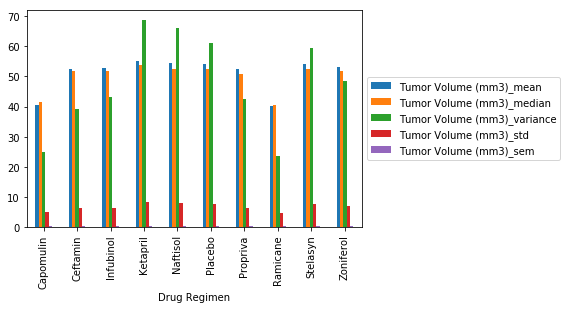

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

df_merged.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


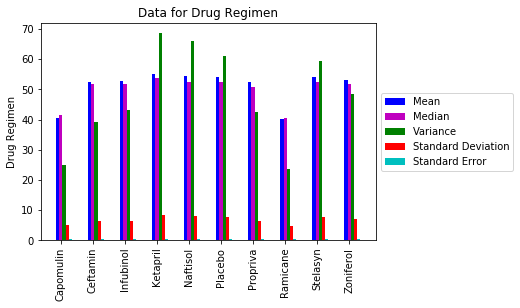

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

import numpy as np 
labels = list(df_merged.index.values)
N = len(labels)

ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width, mean, width, color='b')
rects2 = ax.bar(ind, median, width, color='m')
rects3 = ax.bar(ind + width , variance, width, color='g')
rects4 = ax.bar(ind + 2*width , df_merged['Tumor Volume (mm3)_std'], width, color='r')
rects5 = ax.bar(ind + 3*width ,df_merged['Tumor Volume (mm3)_sem'] , width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Drug Regimen')
ax.set_title('Data for Drug Regimen')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation = 90)

ax.legend((rects1[0], rects2[0],rects3[0], rects4[0], rects5[0] ), ('Mean', 'Median', 'Variance', 'Standard Deviation', 'Standard Error'), loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

## Pie plots

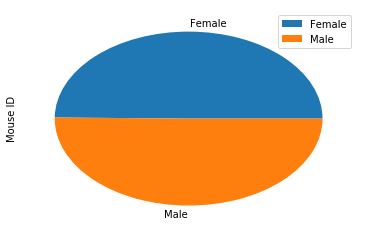

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_df = pd.DataFrame(mouse_metadata.groupby(['Sex']).nunique())
count_df
count_df.plot.pie(y = 'Mouse ID')


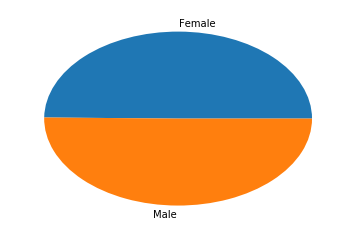

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_df['Mouse ID'],labels=count_df.index.values)
plt.show()

## Quartiles, outliers and boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merged_df_again = pd.merge(left=mouse_metadata, right=study_results)
merged_df_45 =merged_df_again.loc[merged_df_again["Timepoint"] == 45]
merged_df_45
# determine drug regiments with smallest tumor volume
merged_df_45.groupby(merged_df_45['Drug Regimen']).mean()
# The best regiments are Ramicane, Capomulin, Ceftamin, and Infubinol
ramicane = merged_df_45.loc[merged_df_45["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
capomulin = merged_df_45.loc[merged_df_45["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ceftamin = merged_df_45.loc[merged_df_45["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
infubinol = merged_df_45.loc[merged_df_45["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']


In [58]:
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_outliers = ramicane.loc[(ramicane < ramicane.quantile(0.25)) | (ramicane > ramicane.quantile(0.25))]
ram_outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_outliers = capomulin.loc[(capomulin < capomulin.quantile(0.25)) | (capomulin > capomulin.quantile(0.25))]
cap_outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_outliers = ceftamin.loc[(ceftamin < ceftamin.quantile(0.25)) | (ceftamin > ceftamin.quantile(0.25))]
cef_outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_outliers = infubinol.loc[(infubinol < infubinol.quantile(0.25)) | (infubinol > infubinol.quantile(0.25))]
inf_outliers

463     67.973419
473     65.525743
540     66.083066
637     72.226731
800     62.435404
834     60.918767
1053    66.196912
1813    67.685569
Name: Tumor Volume (mm3), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25c2fe48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25c3a7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25c2f518>,
 'medians': [<matplotlib.lines.Line2D at 0x1a25c44588>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25c44470>,
 'means': []}

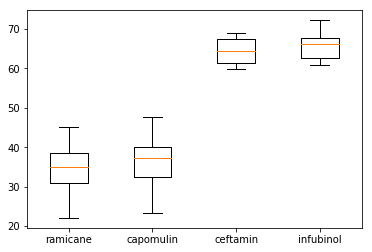

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([ramicane, capomulin, ceftamin, infubinol],labels=['ramicane','capomulin','ceftamin','infubinol'])

## Line and scatter plots

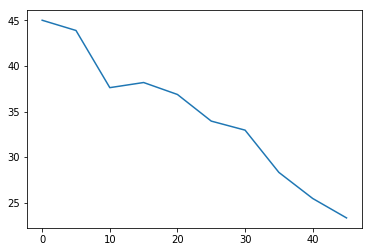

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
merged_df = pd.merge(left=mouse_metadata, right=study_results)
capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_data_s185 = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
capomulin_data_s185
plt.plot(capomulin_data_s185['Timepoint'],capomulin_data_s185['Tumor Volume (mm3)'])

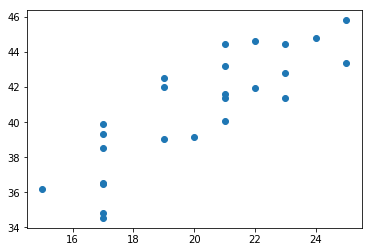

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(capomulin_data.groupby('Mouse ID').mean()['Weight (g)'],capomulin_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])